<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Machine Learning 101</h1>

## La necesidad de Encontrar Patrones
### Estimando la probabilidad del movimiento en el valor de activos
![LDA](../files/imgs/LDA.png)

### Detectando _outliers_ en comportamiento de mercados
![spreads](../files/imgs/spreads.png)

### Distribuciones Multimodales

![MDN](../files/imgs/mdn.png)

### Creación de Nueva Información

<span style="color:crimson">la junta de gobierno esta a favor </span> <i>de con otivo por las posi la pol itica mantenticar las a 2019 la inclativo del economia de conticiones a catarias aciver con extancialente se argendo de contisus inacticas delmedcano de resis nicresi pora contenticas inacimosteres respuntaria la potribal para contiyan la polisicam entrencialecienos</i>

## ¿Qué es Machine Learning (*ML*)?
> *Machine Learning es el área de estudio que le da a las computadoras la habilidad de aprender sin necesidad de ser explicitamente programadas.* - Arthur Samuel

> _[Machine learning is] a set of methods that can automatically detect patterns in data, and then use the uncovered patterns to predict future data, or to perform other kinds of decision making under uncertainty._ -Kevin P. Murphy

In [1]:
# Cargamos las librerías que estaremos ocupandos para la clase
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed, randn
from ipywidgets import interact, IntSlider, FloatSlider

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)

En general, se dice que un programa de computación aprende de una experiencia **E** con respecto a una _clase_ de tarea **T** y medida de desempeño **P** si el desempeño en **T**, medido bajo **P** mejora con experiencia **E**

## La tarea $T$

Machine learning nos ayuda a atacar problemas o tareas que serían difícil para un humano escribir usando métodos *tradicionales* de programación, i.e., definiendo la estructura lógica que debería seguir un programa para llegar al resultado.

Una **tarea** en machine learning es descrita en términos de como el sistema debe procesar una **observación** ($x$), la cuál definimos como un arreglo de números.

$$
    x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix},
$$

el cuál conocemos como un vector. Un vector, en python, es representado por medio de un numpy array.

```python
np.array([1, 2, 3, 5])
```

Si, por ejemplo, nuestras observaciones son las características de una persona, podríamos describir una observación de la siguiente manera:

$$
   \mbox{persona}_i = \begin{bmatrix} \mbox{edad} \\ \mbox{peso} \\ \mbox{estatura} \\ \mbox{color ojos} \\ \vdots \end{bmatrix}
$$

¿Cuáles podrían ser las tareas?

La **tarea**, dado $\mbox{persona}_i$, sería el resultado que pudiesemos obtener una vez procesado esta información: esperanza de vida de la persona; prima de un seguro; probabilidad de gusto hacia cierto producto, etc.

**Tareas en Machine Learning**
- Enseñar a un robot a tocar el piano
- Reconocer los dígitos de una imagen
- Detectar transacciones fradulentas
- Estimar ventas futuras

**Tareas no apropiadas para machine learning (aunque posibles)**
- Escribir un programa que calcule la sequencia fibonacci
- Escribir un programa que arroje reportes
- Escribir un programa de operaciones aritméticas

**Una tarea que no necesita machine learning.**

Supongamos que, dadas tres observaciones de personas (`persona1`, `persona2`, `persona3`), ¿sería la tarea **T** de cácular el índice de masa corporal un problema de Machine Learning?

$$
    \mbox{BMI} = \frac{\mbox{Masa}_{Kg}}{\mbox{Altura}_{m}^2}
$$

donde,
$$
    \mbox{persona}_i = \begin{bmatrix} \mbox{masa} \\ \mbox{altura} \end{bmatrix}
$$

```python
import numpy as np
persona1 = np.array([60, 1.40])
persona2 = np.array([180, 1.20])
persona3 = np.array([62, 1.66])
```

In [3]:
# En otras palabras, la tarea para un algoritmo de ML es encontrar la función apropiada
# para los datos en cuestión. En este ejemplo no es necesario usar ML dado que
# estamos seguros del resultado que arroja la tarea dado cada ejemplo.

def bmi(persona):
    """
    Calcula el Indice de masa corporal de una persona
    
    Parametros
    -----------
    Persona: list
        lista con cuyo primer elemento es el peso (en Kg) 
        y el segundo la altura (en metros) de una persona
    """
    return persona[0] / persona[1] ** 2

persona1 = np.array([60, 1.40])
persona2 = np.array([180, 1.20])
persona3 = np.array([62, 1.66])

print(bmi(persona1))
print(bmi(persona2))
print(bmi(persona3))

30.612244897959187
125.0
22.49963710262738


### Las clases de Tareas:
- Clasificación
    - Asignar una calificación del 1 al 5 para una película
    - Sentimiento de mercado respecto a un producto
- Regresión
    - Estimar ventas futuras
    - Estimar precio de productos
    - Estimar peso de una persona (dada su altura)
- *Machine Translation*
    - Traducir 
- Detección de anomalías
    - Dado un sistema, encontrar patrones estadísticos fuera del promedio de observaciones "normales".
- *Denoising*
    - Dada información corrompida, limpiar los datos
- Reducción de Dimensiones

## La Experiencia $E$

La *experiencia* es la información de la cual se alimenta nuestro modelo para realizar estimaciones. El tipo de experiencia depende de la clase de tarea de la cuál estemos hablando. Esta información se ve representada en un conjunto de observaciones que llamamos un **dataset** (la base de datos).

Considerando el ejemplo anterior, si contamos con 3 ejemplos de personas, el agrupamiento de cada una de las personas conformaría nuestra base de datos.

$$
    \mbox{personas} = \begin{bmatrix}
    \mbox{persona}_1, \mbox{persona}_2, \mbox{persona}_3
    \end{bmatrix}
$$

$$
    \mbox{personas} = \begin{bmatrix}
        \mbox{edad}_1 & \mbox{edad}_2 & \mbox{edad}_3 \\
        \mbox{peso}_1 & \mbox{peso}_2 & \mbox{peso}_3 \\
        \mbox{estatura}_1 & \mbox{estatura}_2 & \mbox{estatura}_3 \\
        \mbox{color ojos}_1 & \mbox{color ojos}_2 & \mbox{color ojos}_3 \\
        \vdots & \vdots & \vdots
    \end{bmatrix}
$$

Otra representación, más común, de los datos es representando cada columna las carácterísticas y, cada fila, las observaciones.

Persona | edad | peso | estatura
--- | --- | --- | ---
$\mbox{persona}_1$ | $\mbox{edad}_1$ | $\mbox{peso}_1$ | $\mbox{estatura}_1$
$\mbox{persona}_2$ | $\mbox{edad}_2$ | $\mbox{peso}_2$ | $\mbox{estatura}_2$
$\mbox{persona}_3$ | $\mbox{edad}_3$ | $\mbox{peso}_3$ | $\mbox{estatura}_3$

Dependiendo del tipo de experiencia que un modelo necesita categorizamos un modelo como **supervised** o **unsupervised** learning.

![mldiag](../files/mlgram.png)

Hablando en términos generales,**unsupervised learning** se encarga de buscar patrones dentro de nuestro *dataset*. Para este tipo de problemas, no sabemos de antemano que es lo que agrupa diferentes grupos. En este tipo de problemas solo conocemos las características (o **features**) de nuestra base de datos. Por otro lado, un modelo de **supervised learning** contiene tanto características como un factor diferenciador: un precio, una clase, etc.

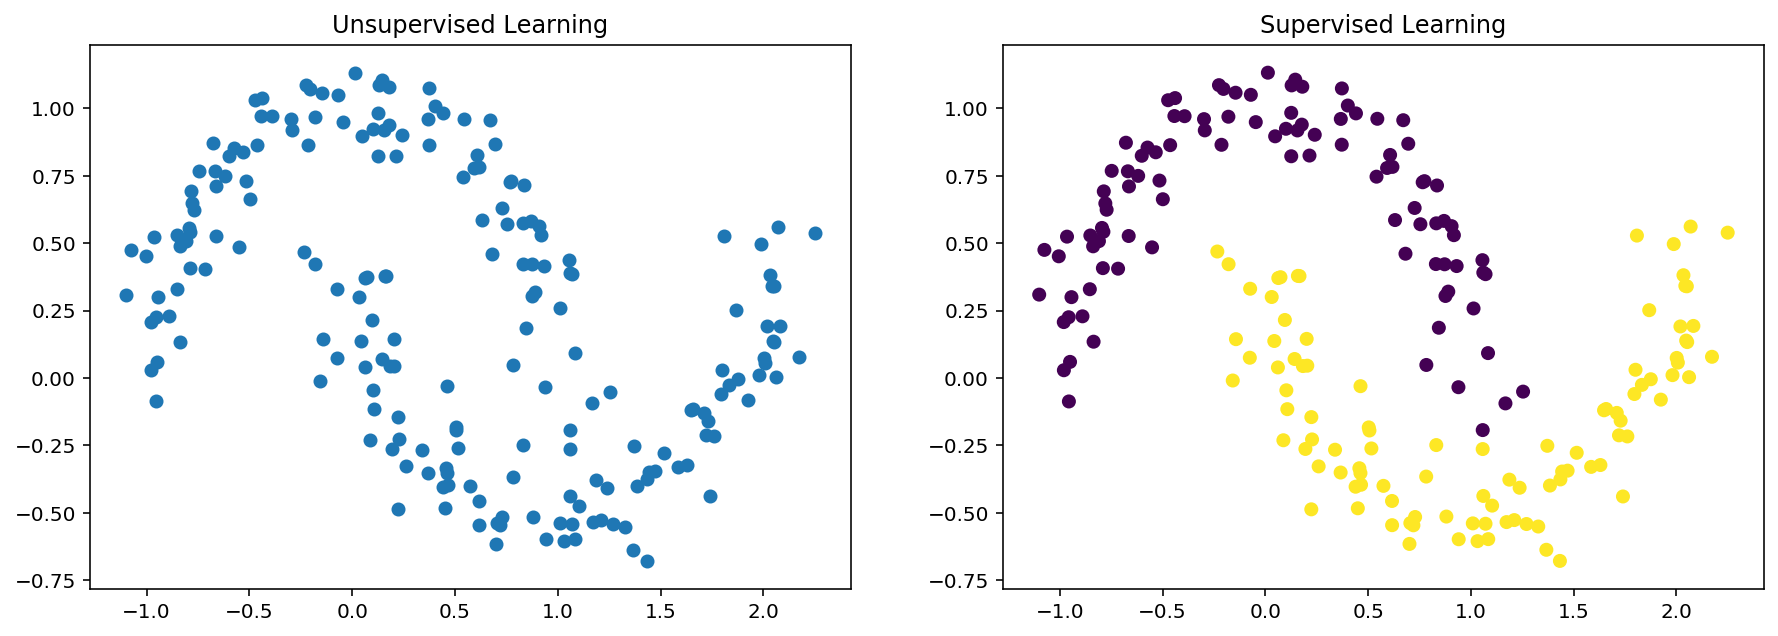

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1, random_state=1643)
fig = plt.figure(figsize=(15,5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
ax1.scatter(*X.T)
ax2.scatter(*X.T, c=y, cmap=plt.cm.viridis)
ax1.set_title("Unsupervised Learning")
ax2.set_title("Supervised Learning")
plt.show()

## El Desempeño $P$

Para evaluar las habilidades de un modelo en machine learning es necesaria una manera cuantitativa de medir su **desempeño**. Una medida de desempeño es tan importante como el problema a solucionar.

La finalidad de un desempeño se divide en dos:
1. $P$ nos debe ayudar a llegar a una $T$ óptima para la base de datos
2. $P$ mide como nuestro modelo, bajo $T$, generaliza las decisiones para ejemplos **aún no observados** (predicciones)

En general, dada una seríe de datos, dividimos nuestros datos en dos partes: **training** y **test**. El objetivo es entonces encontrar $T$ dado **training** que generalice los valores no observados dentro de test.
![dataset](./images/mldata1.png)

<center>
Fig. Partición de la base de datos entre <i>training</i> y <i>test</i>
</center>

### Medidas de desempeño:

#### Clasificación
$$
    \mbox{accuracy} = \frac{\#\mbox{Predicciones Correctas}}{\#\mbox{Valores totales}}
$$

#### Regresión

$$
    \mbox{MSE} = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

$$
    \mbox{R}^2 = 1 - \frac{\mbox{RSS}}{\mbox{TSS}} = 1 -  \frac{\sum_i^n(y_i - \hat y_i)^2}{\sum_i^n(y_i - \bar y)^2}
$$

<h2 style="color:crimson">Ejercicio</h2>

Supngamos que entrenado un modelo de clasificación binario ($\{0, 1\}$) nos arroja predicciones dentro de la lista `preds`. Si los valores verdaderos se encuentran dentro de la lista `verdaderos`, calcula el *accuracy* del modelo.

```python
predicciones = np.array([1, 1, 0, 1, 0, 0])
verdadero = np.array([1, 0, 0, 1, 1, 0])
```

## La Regresión Lineal (v.1)

Como su nombre menciona, la regresión lineal es un problema de regresión. En este modelo asumimos que nuestros **features** se relacionan con los **targets** de una manera lineal.


Otra manera de plantear el problema es decir que nuestras observaciones son las *variables independientes* y la variable a predecir la *variable dependiente*

Como un primer ejemplo, consideremos que tenemos una base de datos (**E**) $(x, y)$.

x|y
-|-
$x_1$|$y_1$
$x_2$|$y_2$
$x_3$|$y_3$
...|...
$x_{100}$|$y_{100}$

Nuestra hipótesis (la tarea $T$ a resolver), es poder aproximar $y$ dado $x$ de la siguiente manera:

$$
    \hat y = \theta_0 + \theta_1 x
$$

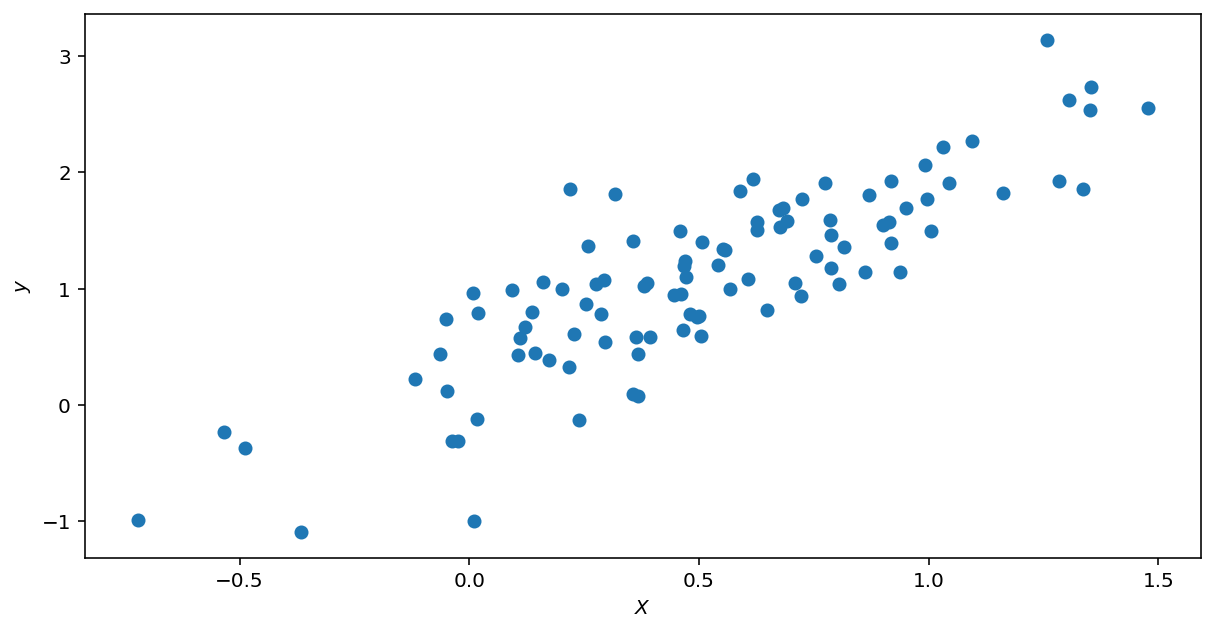

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, randn
# Semilla inicial para llegar al mismo resultado
seed(1643)
# Número de observaciones simuladas
nobs = 100
# Variables independientes
X = np.linspace(0, 1, nobs) + randn(nobs) * 0.3
# Variables dependientes
theta0, theta1 = 0.3, 1.5 # --- No los conocemos
y = theta0 + theta1 * X + randn(nobs) * 0.35
plt.scatter(X, y)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

¿Cómo encontramos $\theta_0$, $\theta_1$?

**¡Necesitamos una medida de desempeño $P$!**

Consideramos $P$ como la función
$$
\begin{align}
    J(\theta_0, \theta_1) &= \frac{1}{n}\sum_{i=1}^{n} (\theta_0 + \theta_1 x_i - y_i)^2 \\
                          &= \frac{1}{n} \left[(\theta_0 + \theta_1 x_1 - y_1)^2 + (\theta_0 + \theta_1 x_2 - y_2)^2 + \ldots + (\theta_0 + \theta_1 x_{n} - y_{n})^2\right]
\end{align}   
$$

Nos gustaría minimizar $J(\theta_0, \theta_1)$

<h2 style="color:crimson">Ejercicio</h2>

Si `theta0_est = 1.3` y `theta1_est = 0.3` son nuestras estimaciones de $\theta_0$ y $\theta_1$ dado `X` y `y`, cálcula $J($ `theta0_est`, `theta1_est`$)$

¿Por qué $J(\theta_0, \theta_1)$?

1. Mide las desviaciones al cuadrado entre nuestra hipótesis y la observación real
2. Minimiza el negativo de la log-verosimilitud

In [6]:
def J(yhat, y): return np.sum((yhat - y) ** 2) / len(y)

def plotJ(theta0, theta1):
    """
    Función para graficar la norma L2 de una regresión lineal
    """
    seed(31415)
    x = np.array([1, 1.5, 2, 3, 4, 5, 5.6])
    xrange = np.linspace(min(x), max(x), 100)
    y = 1 + 1.5 * x + randn(len(x))
    yhat = theta0 + theta1 * xrange
    plt.scatter(x, y)
    plt.plot(xrange, yhat, color="crimson")
    plt.ylim(0, 12)
    plt.title(r"$J(\theta_0, \theta_1) =$" + format(J(theta0 + x * theta1 , y), "0.2f"))
    for xi, yi in zip(x, y):
        pred = theta0 + xi * theta1
        plt.vlines(xi, yi, pred)
        plt.text(xi + 0.1, yi, round((yi - pred) ** 2, 2))

In [7]:
interact(plotJ,
        theta0=FloatSlider(min=-1, max=2, step=0.1, continuous_update=False),
        theta1=FloatSlider(min=0, max=3, step=0.1, continuous_update=False))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='theta0', max=2.0, min=-1.0)…

<function __main__.plotJ(theta0, theta1)>

¿Por qué $J(\theta_0, \theta_1)$ tiene sentido?

##### Óptimo Global (Un único mínimo)

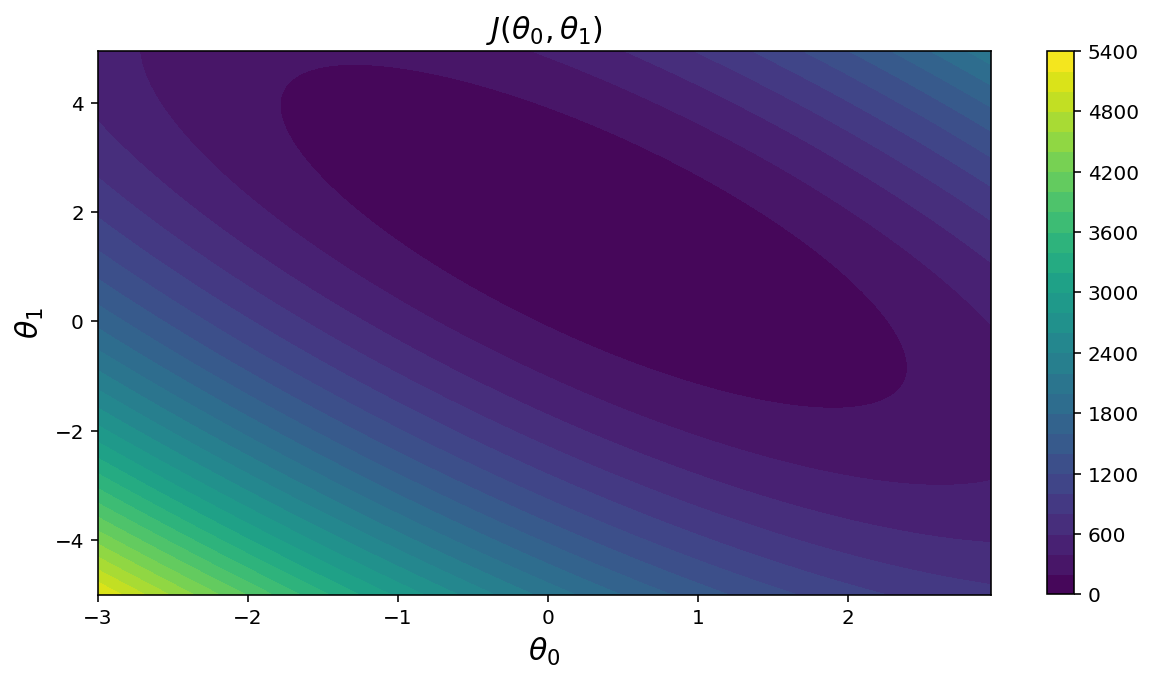

In [8]:
t0, t1 = np.mgrid[-3:3:0.05, -5:5:0.05]
z = (t0.reshape(-1, 1) + t1.reshape(-1, 1) *  X - y) ** 2
z = z.sum(axis=1).reshape(t0.shape)
plt.contourf(t0, t1, z, 25)
plt.xlabel(r"$\theta_0$", fontsize=15)
plt.ylabel(r"$\theta_1$", fontsize=15)
plt.title(r"$J(\theta_0, \theta_1)$", fontsize=15)
plt.colorbar();

Para un *training dataset* $(x, y)$ con $n$ observaciones, se puede demostrar que los los valores $\theta_0^*$, $\theta_1^*$ que minimizan  $J(\theta_0, \theta_1)$ son:

$$
    \theta_1^* = \frac{n\sum_{i=1}^nx_iy_i - \left(\sum_{i=1}^nx_i\right)\left(\sum_{i=1}^ny_i\right)}{n\sum_{i=1}^nx_i^2 - \left(\sum_{i=1}^nx_i\right)^2}
$$

$$
    \theta_0^* = \frac{1}{n}\sum_{i=1}^ny_i - \theta_1^* \frac{1}{n}\sum_{i=1}^nx_i
$$

<h2 style="color:crimson">Ejercicio</h2>

Calcula `theta0_opt`, `theta1_opt` consierando las ecuaciones de arriba y compara los resultados contra `theta0`, `theta1` (los verderos parámetros)

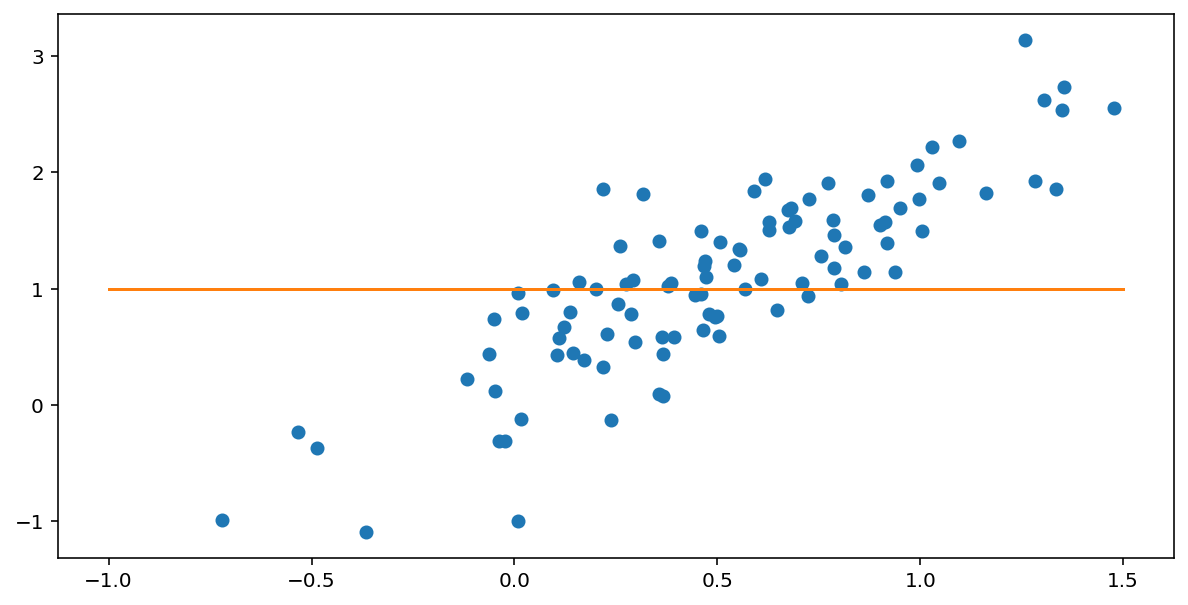

In [9]:
n = len(X)

# Escribe tu código para theta0_opt y theta1_opt
theta1_opt = 0
theta0_opt = 1

xrange = np.linspace(-1, 1.5, 100)
plt.scatter(X, y)
plt.plot(xrange, theta0_opt + theta1_opt * xrange, color="tab:orange")


## La Regresión Lineal (v.2)

¿Qué sucede si tenemos más de un feature (variable independiente) por cada observación?
Supongamos que tenemos $n$ observaciones, cada una con $m$ features.

x1|x2|...|xn|y
-|-|-|-|-
$x_{1,1}$|$x_{1,2}$|$\ldots$|$x_{1,n}$|$y_1$
$x_{2,1}$|$x_{2,2}$|$\ldots$|$x_{2,n}$|$y_2$
$x_{3,1}$|$x_{3,2}$|$\ldots$|$x_{3,n}$|$y_3$
$\vdots$|$\vdots$|$\ldots$|$\vdots$|$\vdots$
$x_{m,1}$|$x_{m,2}$|$\ldots$|$x_{m,n}$|$y_{m}$

Donde $x_{i,j} = x^{(i)}_j$ indica la $j$-ésima característica de la $i$-ésima observación.

En este caso, el problema sería encontrar $\theta_1, \theta_2, \ldots, \theta_m$. Nuestra predicción para la $i$-ésima observación $\hat y$ estaría dada por
$$
    \begin{align}
    \hat y_i &= \theta_0 + \theta_1 x_{1} +  \theta_2 x_2 + \ldots + \theta_m x_m\\
            &= \theta^T x^i
    \end{align}
$$

Donde
$$
    \theta = \begin{bmatrix}
                \theta_0 \\
                \theta_1 \\
                \theta_2 \\
                \vdots  \\
                \theta_m
             \end{bmatrix}
$$

$$
    x_i = \begin{bmatrix}
                1 \\
                x_{1,i} \\
                x_{2,i} \\
                \vdots  \\
                x_{m,i}
             \end{bmatrix}
$$

Definimos nuestro *training* dataset como la siguiente representación matricial:
$$
    X = \begin{bmatrix}
        – x_1 – \\
        – x_2 – \\
        \vdots \\
        – x_m – \\
        \end{bmatrix}
        = \begin{bmatrix}
                1 & x_{1,1} & x_{1,2} & \ldots & x_{1,m}\\
                1 & x_{2,1} & x_{2,2} & \ldots & x_{2,m}\\
                \vdots & \vdots & \vdots & \ddots & \vdots\\
                1 & x_{n,1} & x_{n,2} & \ldots & x_{n,m}\\
          \end{bmatrix}
$$

siendo los targets:
$$
    y = \begin{bmatrix} y_1 & y_2 & \ldots & y_n \end{bmatrix}
$$

Para un problema de **regresión lineal generalizada**, el vector $\theta^* = [\theta_0, \theta_1, \ldots, \theta_m]$ de valores que minimizan $J(\theta_0, \theta_1, \ldots, \theta_m)$ dado por

$$
    \theta^* = (X^T X)^{-1} X^T y
$$

<h2 style="color:crimson">Ejercicio</h2>
Considerando 

```python
Xx = np.c_[np.ones(len(X)), X]
```

y el vector $y$, usando la fórmula de la regresión lineal generalizada, valida que las entradas de este vector sean iguales a las variables `theta0_opt`, `theta1_opt`.

**Nota 1**: La matrix `Xx` añade una columna de $1$s para cálcular el *bias* o factor de corrección

**Nota 2**: Para calcular la inversa de una matriz puedes usar la función `np.linalg.inv` desde `numpy`

### Regresión Linal usando `scikit-learn`

Durante este curso estaremos usando la librería `scikit-learn` para ahorrarnos los detalles en la implementación de los modelos. `scikit-learn` está escrita sobre numpy y es usada por compañías y universidades en su implementación y análisis de modelos de ML.

El primer paso para usar cualquier modelo dentro de la librería scikit learn es importarlo desde la *familia* a la cuál pertenece. Para nuestro modelo de regresión lineal, el modelo es llamado `LinearRegressio` y se encuentra dentro de la familia `linear_model`.

In [10]:
from sklearn.linear_model import LinearRegression

# Inicializamos una instancia de la clase LinearRegression
# Hacer esto permite modificar hyperparámetros del modelo a aprender
linreg = LinearRegression()
# Pasamos la mariz de features y el vector de targets
linreg.fit(X.reshape(-1, 1), y)
linreg.intercept_, linreg.coef_

(0.30375826386053706, array([1.55643992]))

### Interpretando los resultados de una regresión lineal

Una regresión lineal, aunque un modelo relativamente simple, nos da la oportunidad de poder interpretar los resultados obtenidos al problema sobre el cual estamos trabajando.

Consideremos el dataset `california_housing` con el precio de las casas en california. De manera ingenua, consideraremos todas las variables dentro de la base de datos *as is* (recordemos que antes de entrenar cualquier modelo de machine learning, es importante analizar los datos para poder llegar a una conclusión más razonable sobre los resultados del modelo o como mejorar su desempeño)

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
linmodel = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(housing.data, housing.target,
                                                test_size=0.2, random_state=314)
linmodel.fit(xtrain, ytrain)
print(f"R2 del modelo: {linmodel.score(xtrain, ytrain):0.5f}")

R2 del modelo: 0.60665


<h2 style="color:crimson">Ejercicio</h2>

Dados los resultados de nuestra regresión lineal sobre los datos `housing`, interpreta los resultados.

In [15]:
for coef, lab in zip(linmodel.coef_, housing.feature_names):
    print(f"{lab:>{len(max(housing.feature_names))}}: {coef * 100_000:,.2f}")

    MedInc: 43,619.53
  HouseAge: 980.06
  AveRooms: -10,515.12
 AveBedrms: 61,910.56
Population: -0.35
  AveOccup: -408.19
  Latitude: -41,988.09
 Longitude: -43,344.95


### Generalización: *overfitting* v.s. *underfitting*

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degrees = np.arange(1, 8)
seed(31415)
nobs = 50

Xtrain = np.linspace(0, 1, nobs) + randn(nobs) * 0.15
ytrain = 0.3 + 0.7 * Xtrain - 2.3 * Xtrain ** 2 - 1.4 * Xtrain ** 3 + randn(nobs) * 0.35

Xtest = np.linspace(0, 1, nobs) + randn(nobs) * 0.15
ytest = 0.3 + 0.7 * Xtest - 2.3 * Xtest ** 2 - 1.4 * Xtest ** 3 + randn(nobs) * 0.35

Xtrain = Xtrain.reshape(-1, 1)
Xtest = Xtest.reshape(-1, 1)

train_cost = []
test_cost = []
for deg in degrees:
    #sklearn pipeline: transformamos la variable x en
    # un polinomio de grado deg, seguido de una regresión lineal
    lreg_pipe = Pipeline([
        ("poly", PolynomialFeatures(deg)),
         ("lreg", LinearRegression())
    ])
    
    lreg_pipe.fit(Xtrain, ytrain)
    train_preds = lreg_pipe.predict(Xtrain)
    test_preds = lreg_pipe.predict(Xtest)
    
    train_cost.append(mean_squared_error(ytrain, train_preds))
    test_cost.append(mean_squared_error(ytest, test_preds))

Hacer un modelo para mejorar el costo sobre el **training** dataset no necesariamente implica una mejor generalización a datos aún no observados.

La habilidad de un modelo para aprender una función compleja de los datos se llama **capacidad**. A mayor capacidad, mayor complejidad de los datos podemos capturar. Mucha capacidad y el modelo sufre de *overfitting*, muy poca y el modelo sufre de *underfitting* En general:

<center>
    <bold> Complejidad $\not\Rightarrow$ Precisión </bold>
</center>

Supongamos que
$$
    y = 0.3 + 0.7 x - 2.3 x^2 - 1.4 x ^3 + \varepsilon
$$

In [17]:
def plot_costs(degrees, train, test):
    plt.plot(degrees, train)
    plt.scatter(degrees, train, label="train")
    plt.plot(degrees, test)
    plt.scatter(degrees, test, label="test")
    plt.grid(alpha=0.5)
    plt.title("Costo del modelo como función de un polinomío")
    plt.xlabel("Degree")
    plt.ylabel(r"$J(\theta)$")
    plt.legend()

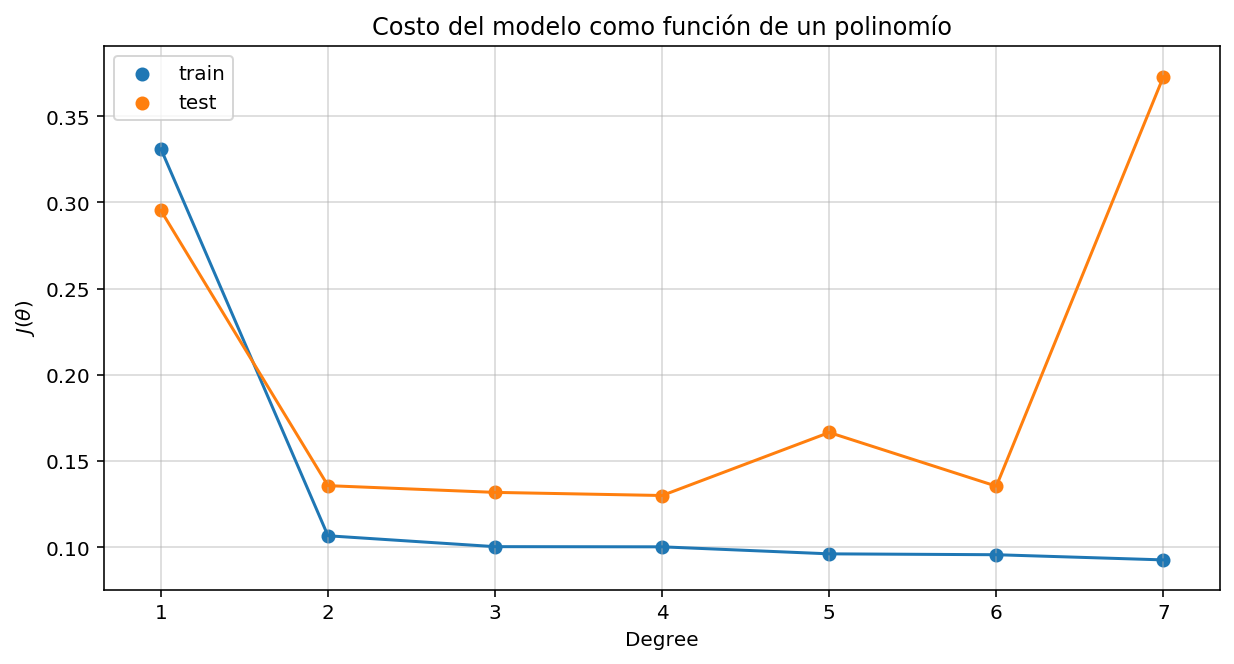

In [18]:
plot_costs(degrees, train_cost, test_cost)